In [1]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt, seaborn as sns

In [2]:
movies = pd.read_csv("movies.csv")

# What is the shape of "movies.csv"?


In [3]:
movies.shape

(9742, 3)

In [4]:
ratings = pd.read_csv("ratings.csv")

In [5]:
ratings.shape

(100836, 4)

# What is the shape of "ratings.csv"?


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# How many unique "userId" are available in "ratings.csv"?


In [7]:
ratings['userId'].nunique()

610

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movie_rating = movies.merge(ratings,how='inner',on='movieId')

In [10]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


# Which movie has recieved maximum number of user ratings?

In [11]:
movie_ratings_count = movie_rating.groupby('title')['rating'].count()

In [12]:
max_ratings_movie = movie_ratings_count.idxmax()
max_ratings_count = movie_ratings_count.max()

In [13]:
print(max_ratings_movie,max_ratings_count)

Forrest Gump (1994) 329


 # Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
tags = pd.read_csv("tags.csv")

In [15]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
movies_tags = movies.merge(tags,how = 'inner', on='movieId')

In [17]:
movies_tags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [18]:
matrix_tag = movies_tags[movies_tags['title'] == 'Matrix, The (1999)']['tag']

In [19]:
matrix_tag.unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [20]:
terminator_ratings = movie_rating[movie_rating['title'] == 'Terminator 2: Judgment Day (1991)']['rating']

In [21]:
terminator_ratings.mean()

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [22]:
fightclub_ratings = movie_rating[movie_rating['title'] == 'Fight Club (1999)']['rating']

(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

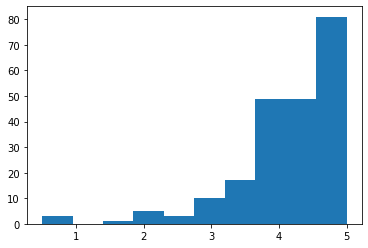

In [23]:
plt.hist(fightclub_ratings)

1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [24]:
movie_rating_aggregation = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

In [25]:
movie_rating_aggregation

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [26]:
merged_data = pd.merge(movies, movie_rating_aggregation, how='inner', on='movieId')

In [27]:
merged_data

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [28]:
filtered_movies = merged_data[merged_data['count'] > 50]

In [29]:
filtered_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.


In [30]:
filtered_movies.sort_values('mean',ascending=False)

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
...,...,...,...,...,...
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [31]:
filtered_movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Action|Adventure|Thriller',
       'Comedy|Drama|Romance', 'Crime|Drama', 'Drama|Romance', 'Comedy',
       'Comedy|Crime|Thriller', 'Mystery|Sci-Fi|Thriller',
       'Children|Drama', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Drama', 'Action|Comedy|Horror|Thriller',
       'Action|Drama|War', 'Crime|Drama|Thriller',
       'Action|Comedy|Crime|Drama|Thriller', 'Adventure|Drama|IMAX',
       'Action|Adventure|Comedy|Crime', 'Adventure|Children',
       'Action|Adventure|Mystery|Sci-Fi', 'Drama|Thriller|War',
       'Action|Romance|Western', 'Action|Drama|Romance',
       'Action|Sci-Fi|Thriller', 'Action|Crime|Sci-Fi',
       'Action|Adventure|Sci-Fi', 'Drama|Thriller', 'Adventure|Comedy',
       'Comedy|Drama', 'Drama|Horror', 'Drama|Romance|War|Western',
       'Action|Drama|Sci-Fi|

# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [32]:
filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')].sort_values('count',ascending=False)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [33]:
links = pd.read_csv("links.csv")

In [34]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [35]:
filtered_movie_link = pd.merge(filtered_movies, links, on='movieId', how='inner')

# Mention the movieId of the movie which has the highest IMDB rating

In [36]:
filtered_movie_link.sort_values('mean',ascending=False)

,movieId,title,genres,count,mean,imdbId,tmdbId
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0
273,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936,137523,550.0
169,1276,Cool Hand Luke (1967),Drama,57,4.271930,61512,903.0
111,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041,57012,935.0
...,...,...,...,...,...,...,...
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0
71,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455,109439,11310.0
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [37]:
filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')].sort_values('mean',ascending=False)

,movieId,title,genres,count,mean
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
900,1199,Brazil (1985),Fantasy|Sci-Fi,59,4.177966
4900,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131,4.160305
...,...,...,...,...,...
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


# Web Scraping

In [38]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.findAll('div', attrs={'class' : 'User reviews'})
    return imdb_rating.text if imdb_rating else np.nan

In [39]:
scrapper('57012')

nan